<a href="https://colab.research.google.com/github/gauravmalakar08/Netflix-Movies-And-Tv-Shows-Clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.


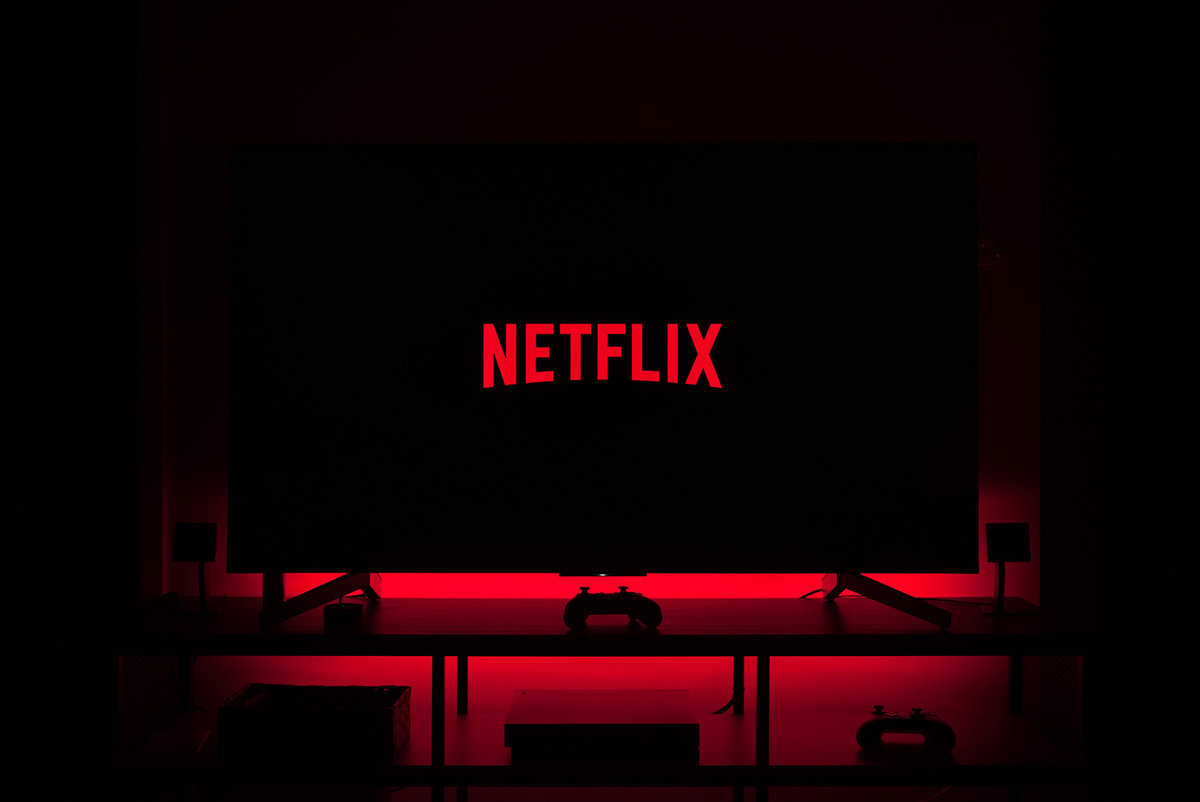

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
sns.set_theme(style= 'whitegrid', palette = 'mako')
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from numpy import math
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
import nltk 
nltk.download('all',quiet=True)
# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import TruncatedSVD

import pylab as pl
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

#stop-words

nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import StandardScaler

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Importing the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Loading the data
df_Netflix = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone Projects /Netflix Movie Recommender System Using Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [6]:
#copying data to preserve orignal file
netflix = df_Netflix.copy()

In [7]:
# Checking for info
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
# Checking for unique
netflix.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [9]:
# Checking for columns
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
# Checking for shape
netflix.shape

(7787, 12)

In [11]:
# Checking for head top five rows
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [12]:
# Find the various statistic for all the columns
netflix.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# To show count of Null values in each column
netflix.isnull().sum() 

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

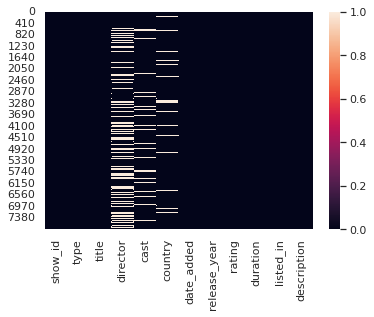

In [14]:
#using heat-map to show null values count
sns.heatmap(netflix.isnull())

In [15]:
#Counts of rating
netflix["rating"].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [16]:
#Counts of cast
netflix["cast"].value_counts()

David Attenborough                                                                                                                                                            18
Samuel West                                                                                                                                                                   10
Jeff Dunham                                                                                                                                                                    7
Kevin Hart                                                                                                                                                                     6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath                                                         6
                                                                                                                   

In [17]:
#Counts of country
netflix["country"].value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [18]:
#Replacing Null to its mode values and drop irrelevant column
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [19]:
netflix.fillna(0,inplace=True)

In [20]:
#date_added column
netflix = netflix[netflix['date_added'].notna()]

In [21]:
# Checking the null values after replaced 
netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [22]:
# New Features
# Add new features
netflix["date_added"] = pd.to_datetime(netflix['date_added'])
netflix['day_added'] = netflix['date_added'].dt.day 
netflix['year_added'] = netflix['date_added'].dt.year
netflix['month_added'] = netflix['date_added'].dt.month

In [23]:
#checking for head after seperating date ,month,year
netflix[["date_added","year_added","month_added"]].head()

,date_added,year_added,month_added
0,2020-08-14,2020,8
1,2016-12-23,2016,12
2,2018-12-20,2018,12
3,2017-11-16,2017,11
4,2020-01-01,2020,1


In [24]:
# Check the Duplicates entries
len(netflix[netflix.duplicated()])

0

#**Exploratory Data Analysis**

In [25]:
sns.set_theme(style= 'whitegrid', palette = 'tab10')

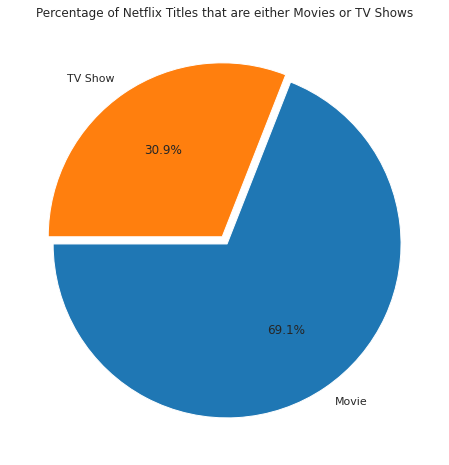

In [26]:
# Plotting the pie plot
plt.figure(figsize=(14,8))
plt.title("Percentage of Netflix Titles that are either Movies or TV Shows")
graph = plt.pie(netflix.type.value_counts(),explode=(0.025,0.025), labels=netflix.type.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

###**Observations** :-

###It's evident that there are more movies on Netflix than TV shows.

###Netflix has 5377 movies, which is more than double the quantity of TV shows.

###There are about 69.1% movies and 30.9% TV shows on Netflix

In [27]:
#storing type feature into individual variable name   
netflix_movies = netflix[netflix["type"]=="Movie"]
netflix_shows = netflix[netflix["type"]=="TV Show"]

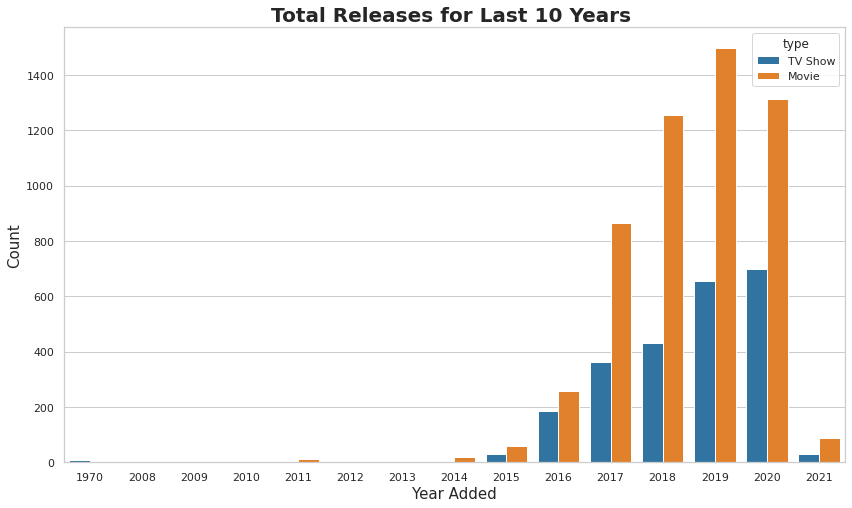

In [28]:
# Total release for last 10 years
plt.figure(figsize=(14,8))
sns.countplot(x='year_added',hue='type',data=netflix)

plt.title('Total Releases for Last 10 Years ',fontsize = 20,fontweight="bold")  
plt.xlabel('Year Added', fontsize = 15) 
plt.ylabel('Count', fontsize = 15)   
plt.show()

### 1. The number of release have significantly increased after 2015 and have dropped in 2021 becase of Covid 19
### 2. Growth in the number of movies on Netflix is much higher than tv shows.




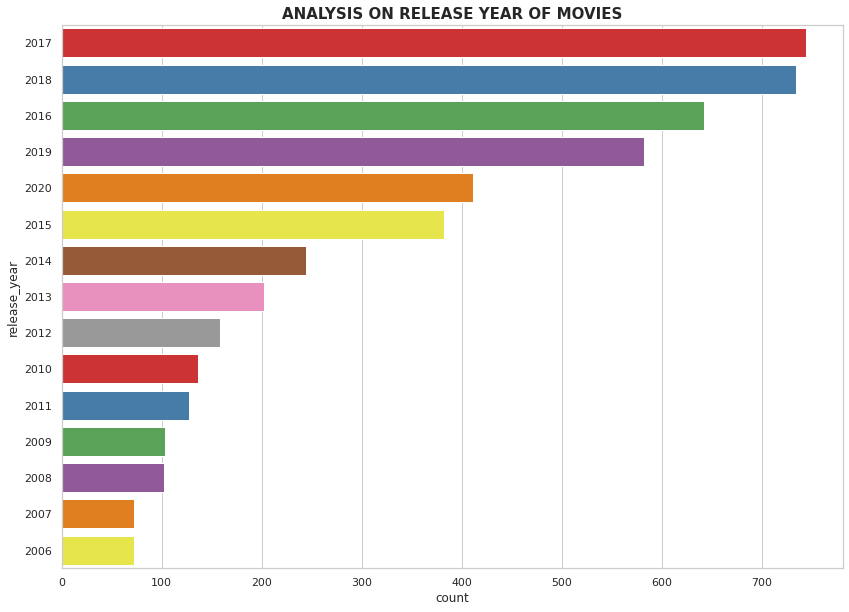

In [29]:
#Year wise analysis
plt.figure(figsize=(14,10))
ax = sns.countplot(y="release_year", data=netflix_movies, palette="Set1", order=netflix_movies['release_year'].value_counts().index[0:15])
plt.title('ANALYSIS ON RELEASE YEAR OF MOVIES', fontsize=15, fontweight='bold')
plt.show()

###Most of the Movies were released in 2017 and 2018

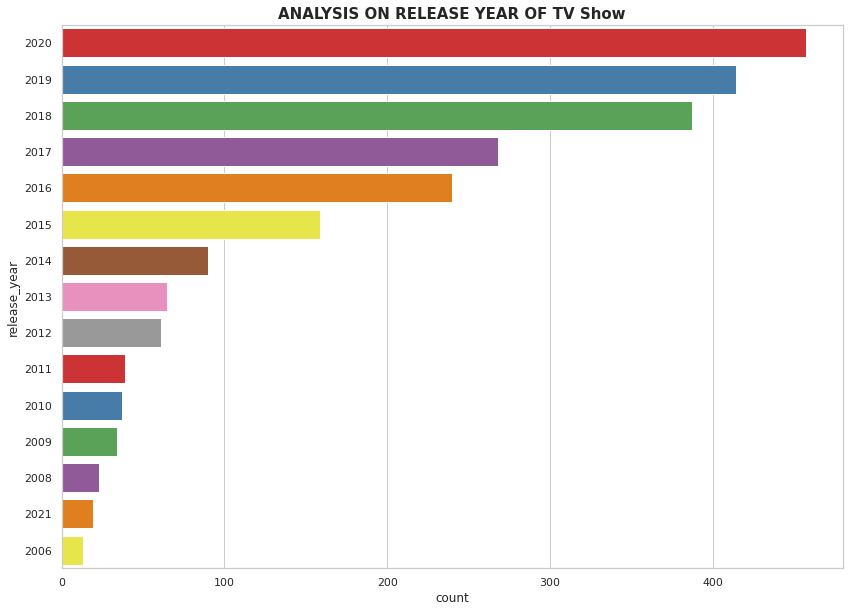

In [30]:
#ANALYSIS ON RELEASE YEAR OF TV Show
plt.figure(figsize=(14,10))
ax = sns.countplot(y="release_year", data=netflix_shows, palette="Set1", order=netflix_shows['release_year'].value_counts().index[0:15])
plt.title('ANALYSIS ON RELEASE YEAR OF TV Show', fontsize=15, fontweight='bold')
plt.show()

###Most of the TV Shows were released in 2020 followed by 2019 and 2018

In [31]:
# Put the data into bins.
release_yr_bin = pd.cut(netflix.release_year, [1924, 1999, 2010, 2021])
release_yr_bin.value_counts()
release_yr_bin = pd.DataFrame(release_yr_bin.value_counts()).reset_index()
release_yr_bin.rename(columns={'index':'year_interval', 'release_year':'count'}, inplace=True)
release_yr_bin['year_interval'] = release_yr_bin['year_interval'].astype('string')
release_yr_bin

,year_interval,count
0,"(2010, 2021]",6437
1,"(1999, 2010]",901
2,"(1924, 1999]",449




### 1.   82% of the content available was released between 2010 and 2021.
### 2. 17.28% of the content available was released before 2010.



In [32]:
# Create dataframe to store day values and count.
days_df = pd.DataFrame(netflix.day_added.value_counts())
days_df.reset_index(inplace=True)
days_df.rename(columns={'index':'day', 'day_added':'count'}, inplace=True)

Text(0.5, 1.0, 'most frequent days')

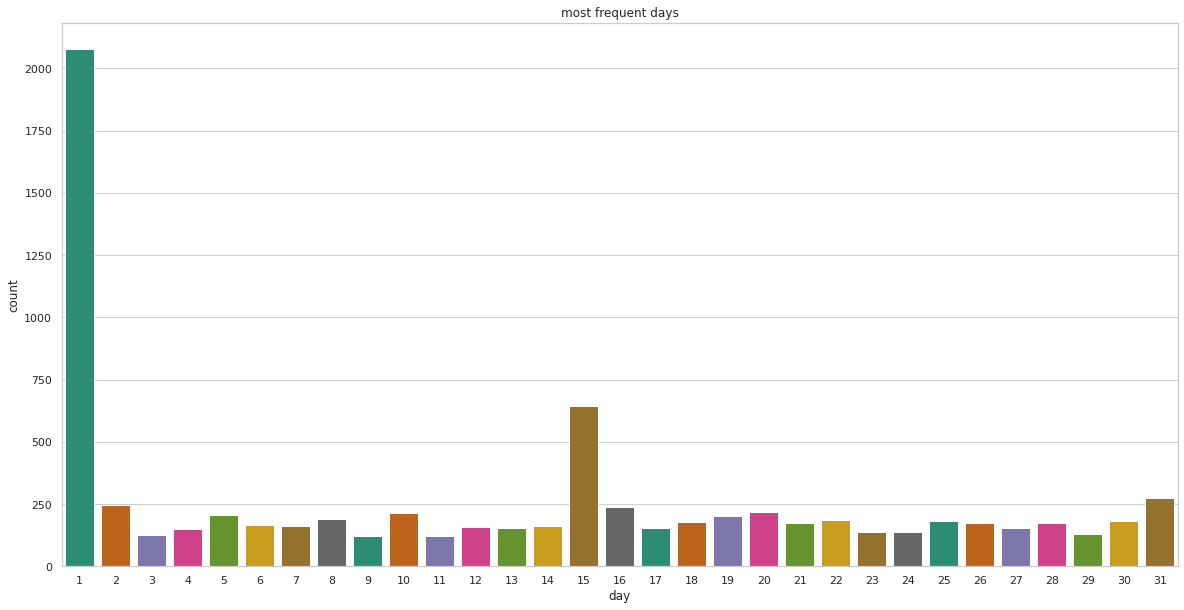

In [33]:
plt.figure(figsize=(20,10))
fig = sns.barplot(data = days_df, x="day", y="count",palette="Dark2")
plt.title('most frequent days')

In [34]:
sns.set_theme(style= 'whitegrid')

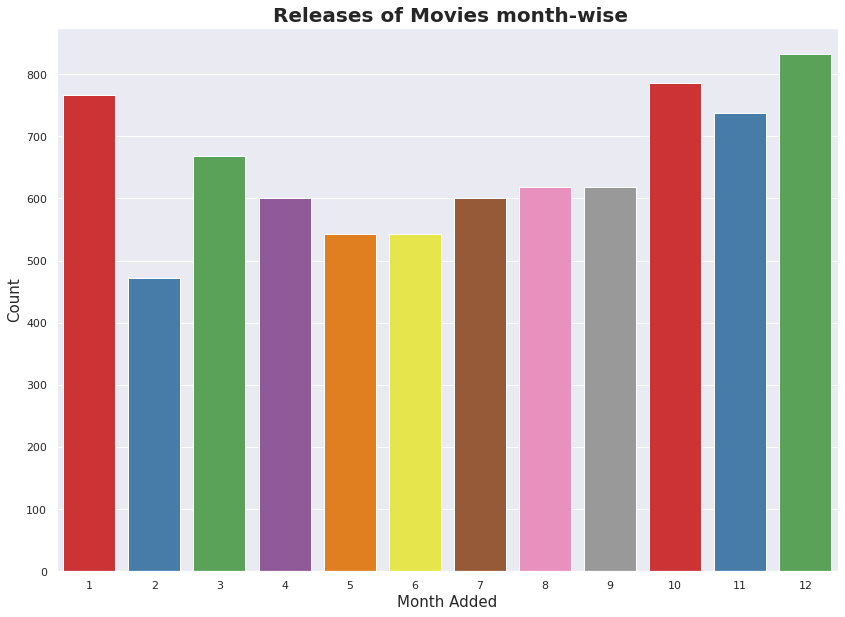

In [35]:
# Release of movies month-wise
sns.color_palette("cubehelix", as_cmap=True)
sns.set(rc={'figure.figsize':(14,10)})
sns.countplot(x='month_added',data=netflix,palette="Set1")


plt.title(' Releases of Movies month-wise',fontsize = 20,fontweight="bold")  
plt.xlabel('Month Added', fontsize = 15) 
plt.ylabel('Count', fontsize = 15)    
plt.show()

###More of the content is released in holiday season - October, November, December and January

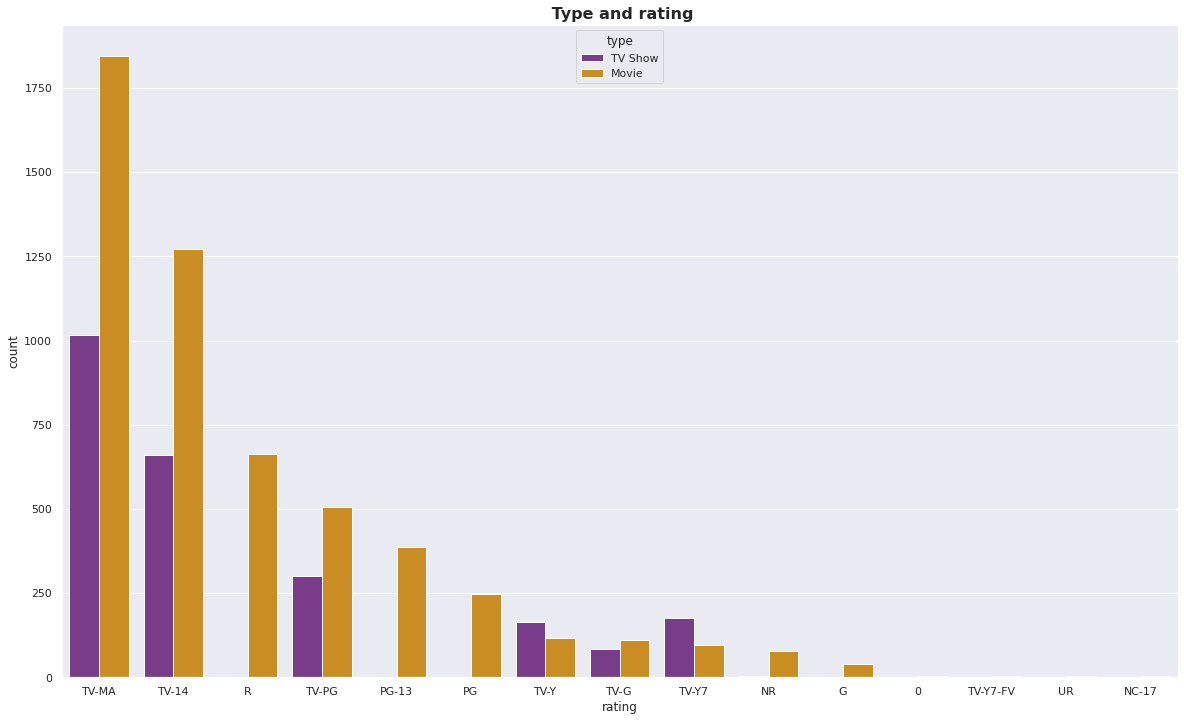

In [36]:
#Rating
plt.figure(figsize=(20,12))
sns.countplot(x='rating',hue='type',data=netflix,palette="CMRmap", order=netflix_movies['rating'].value_counts().index[0:15])
plt.title(' Type and rating',size='16',fontweight="bold")
plt.show()

###**Observation**

###The largest count of movies are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.

###Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.

###Third largest is the very popular 'R' rating.An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17 by the Motion Picture Association of America; the MPAA writes "Under 17 requires accompanying parent or adult guardian".

In [37]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
netflix['target_ages'] = netflix['rating'].replace(ratings)

In [38]:
# type should be a catego
netflix['type'] = pd.Categorical(netflix['type'])
netflix['target_ages'] = pd.Categorical(netflix['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [39]:
#Top 10 country wise analysis
plt.figure(figsize=(20,12))
count_countries=pd.DataFrame(netflix['country'].value_counts()[:11]).reset_index()
count_countries.rename(columns = {'index':'country','country':'count'},inplace=True)
count_countries

,country,count
0,United States,2555
1,India,923
2,0,507
3,United Kingdom,397
4,Japan,226
5,South Korea,183
6,Canada,177
7,Spain,134
8,France,115
9,Egypt,101


<Figure size 1440x864 with 0 Axes>

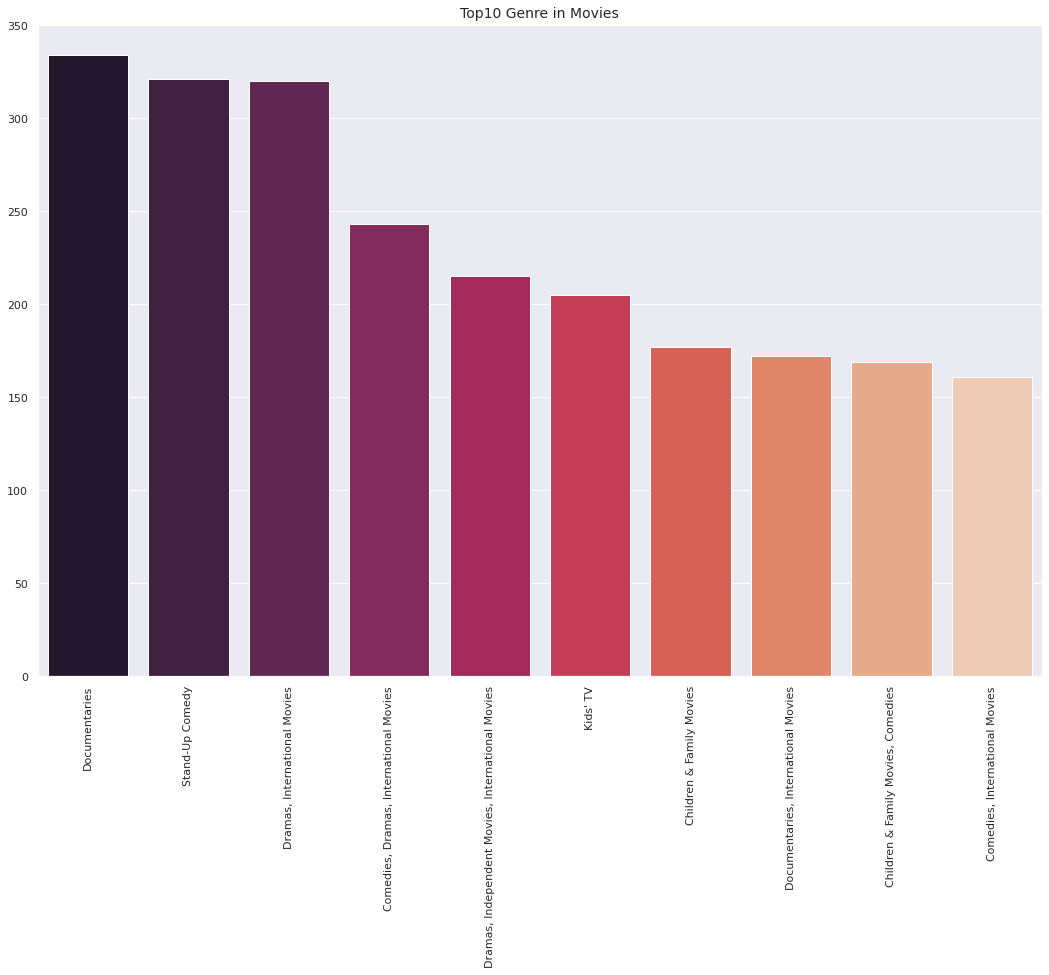

In [40]:
# Top 10 Genre in movies
plt.figure(figsize=(18,12))
sns.barplot(x = netflix["listed_in"].value_counts().head(10).index,
            y = netflix["listed_in"].value_counts().head(10).values,palette="rocket")
plt.xticks(rotation=90)
plt.title("Top10 Genre in Movies",fontsize = 14)
plt.show()

### From the graph, we know that Documentaries take the first place, followed by Stand-up Comedy and Dramas,International Movies

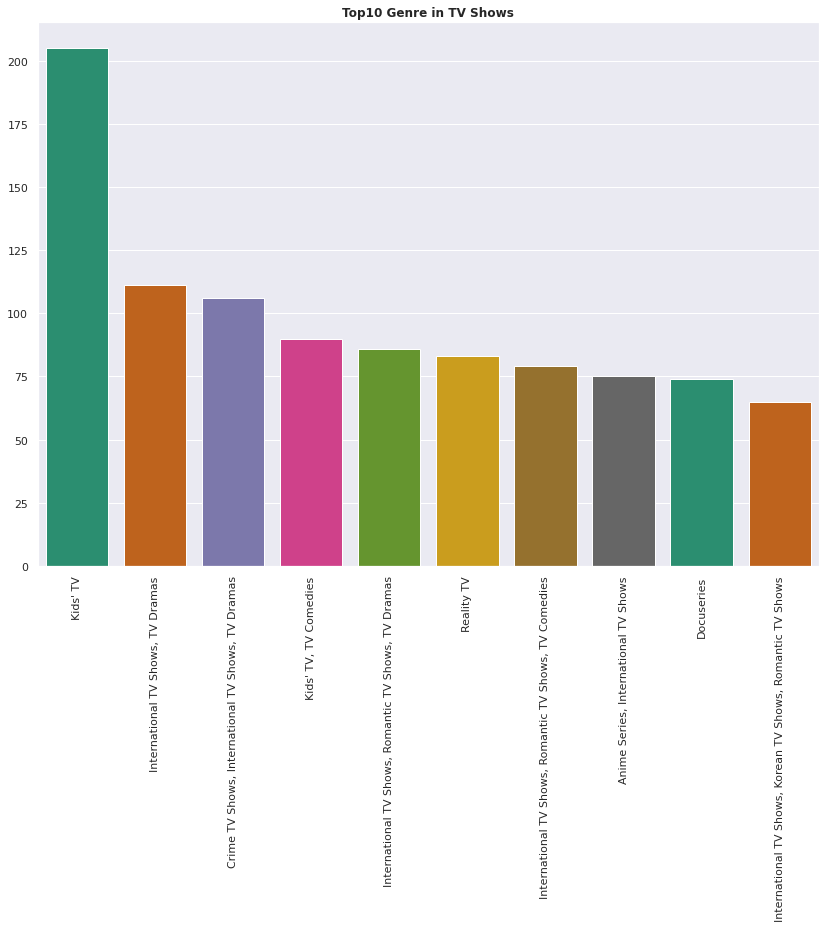

In [41]:
#Top10 Genre in TV Shows
plt.figure(figsize=(14,10))
sns.barplot(x = netflix_shows["listed_in"].value_counts().head(10).index,
            y = netflix_shows["listed_in"].value_counts().head(10).values,palette="Dark2")
plt.xticks(rotation=90)
plt.title("Top10 Genre in TV Shows",fontweight="bold")
plt.show()

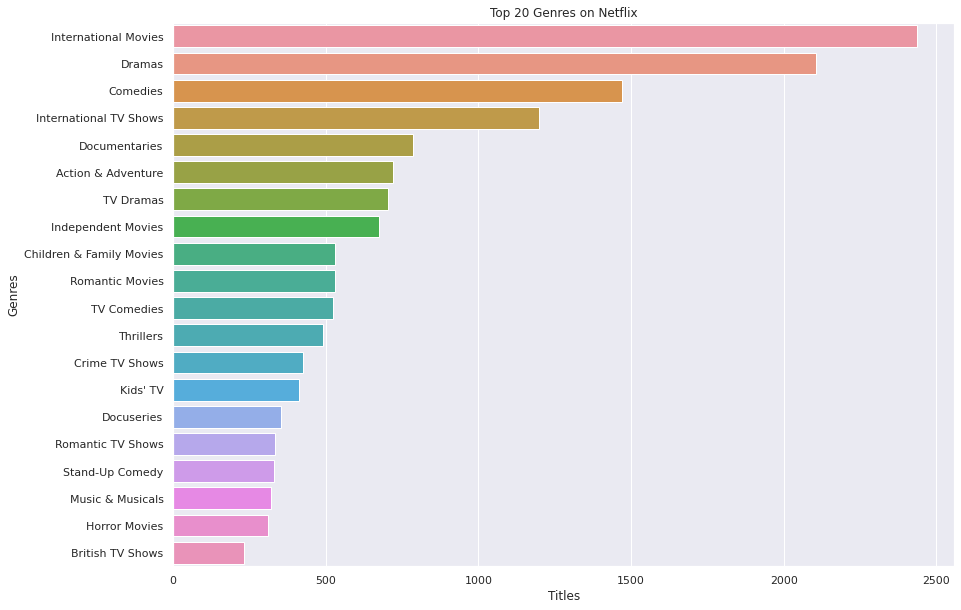

In [42]:
#Top 20 Genres on Netflix
filtered_genres = netflix.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(14,10))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

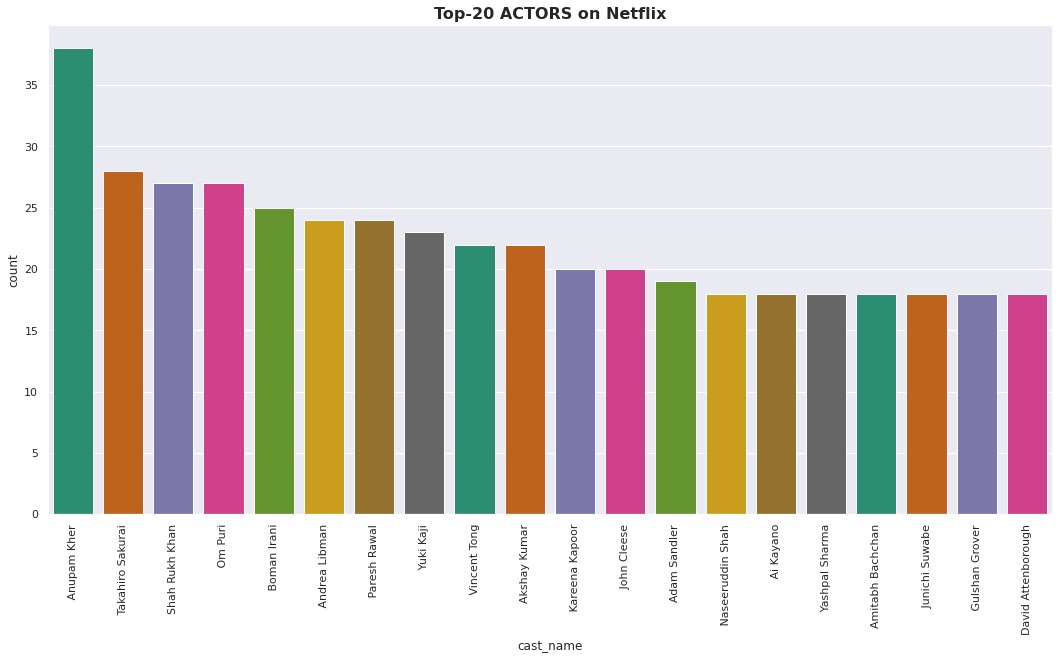

In [43]:
# Top 20 actors netflix
netflix['cast'] = netflix['cast'].astype(str)
netflix['cast_name'] =netflix['cast'].apply(lambda x :  x.split(',')) 
cast_count = []
for i in netflix['cast_name']: cast_count += i
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)
df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:21]
plt.figure(figsize=(18,9))
sns.barplot(x='cast_name',y='count',data=df_cast_count,palette="Dark2")
plt.title("Top-20 ACTORS on Netflix",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

###The top actor on Netflix Movies, based on the number of titles, is Anupam Kher

In [44]:
#showing duration rows head
netflix_movies["duration"].head()

1     93 min
2     78 min
3     80 min
4    123 min
6     95 min
Name: duration, dtype: object

In [45]:
#Duration
netflix_shows['duration']=netflix_shows['duration'].str.replace('Season','')
netflix_shows['duration']=netflix_shows['duration'].str.replace('s','')
netflix_movies['duration']=netflix_movies["duration"].str.replace('min','')

netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)
netflix_shows['duration']=netflix_shows['duration'].astype(str).astype(int)
#netflix['duration']

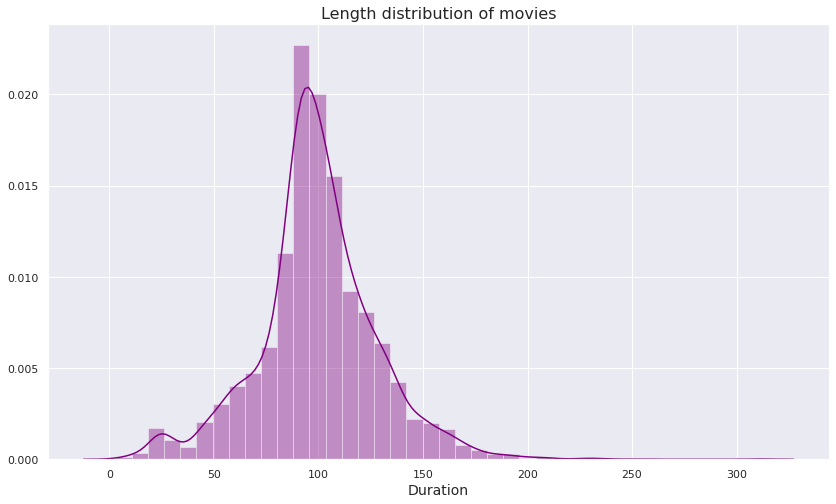

In [46]:
# Length distribution of movies
movie_data = netflix[netflix['type']=='Movie']

plt.figure(figsize=(14, 8))

sns.distplot(netflix_movies['duration'], bins=40,color='purple').set(ylabel=None)

plt.title('Length distribution of movies', fontsize=16)
plt.xlabel('Duration', fontsize=14)
plt.show()

## Most of the movies last for 90 to 120 minutes.

## **HeatMap**

In [47]:
# Preparing data for heatmap
netflix['count'] = 1
data = netflix.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']

heatmap = netflix.loc[netflix['country'].isin(data)]
heatmap = pd.crosstab(heatmap['country'],heatmap['target_ages'],normalize = "index").T
heatmap



country,0,Canada,Egypt,France,India,Japan,South Korea,Spain,United Kingdom,United States
target_ages,,,,,,,,,,
Kids,0.171937,0.180791,0.000000,0.095652,0.016251,0.008889,0.027322,0.022388,0.093199,0.073276
Older Kids,0.235178,0.225989,0.039604,0.060870,0.160347,0.271111,0.120219,0.044776,0.204030,0.187696
Teens,0.274704,0.146893,0.683168,0.165217,0.567714,0.355556,0.382514,0.097015,0.188917,0.237069
Adults,0.318182,0.446328,0.277228,0.678261,0.255688,0.364444,0.469945,0.835821,0.513854,0.501959


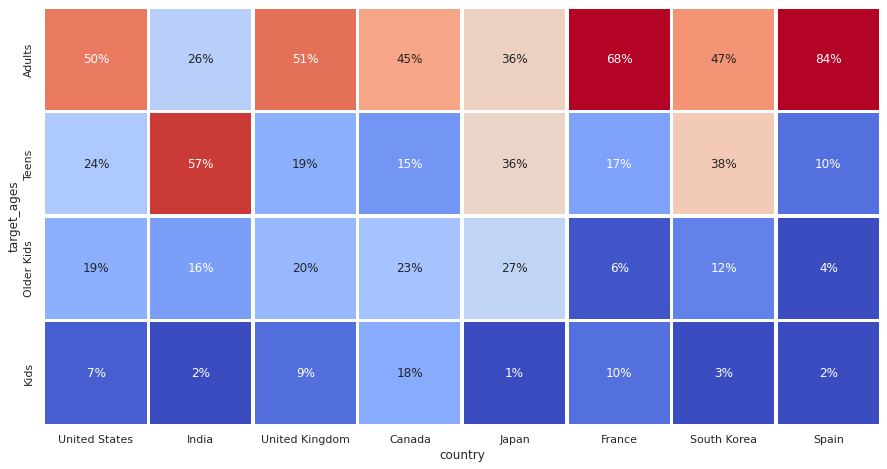

In [48]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

country_order = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(heatmap.loc[age_order,country_order],cmap="coolwarm",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

### proportions of content for adults & teen is greater than kids and older kids

###**LONGEST TV - SHOWS**

In [49]:
#LONGEST TV - SHOWS (seasons)
long_shows = netflix_shows[netflix_shows['duration']>9]
long_shows_data = long_shows[['title','duration']]
long_shows_data.sort_values(by=['duration'],ascending=False)

,title,duration
2538,Grey's Anatomy,16
4438,NCIS,15
5912,Supernatural,15
1471,COMEDIANS of the world,13
5137,Red vs. Blue,13
1537,Criminal Minds,12
7169,Trailer Park Boys,12
1300,Cheers,11
2263,Frasier,11
2678,Heartland,11


#**DATA CLEANING AND PREPROCESSING**

In [50]:
#We will be using text columns to create clusters for our data.

cluster_df = netflix[['title']]
netflix[['description','listed_in','director','cast','country','rating']]=netflix[['description','listed_in','director','cast','country','rating']].astype(str)
cluster_df['cluster_data'] = (netflix['description'] + ' ' + netflix['listed_in'] + ' ' + netflix['director'] + ' ' + netflix['cast'] + ' ' + netflix['country'] + ' ' + netflix['rating'])
cluster_df.set_index('title', inplace = True)
cluster_df.head()
cluster_df.head()

,cluster_data
title,
3%,In a future where the elite inhabit an island ...
7:19,After a devastating earthquake hits Mexico Cit...
23:59,"When an army recruit is found dead, his fellow..."
9,"In a postapocalyptic world, rag-doll robots hi..."
21,A brilliant group of students become card-coun...


In [51]:
# Remove punctuation from the text.
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string 
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
    
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(remove_punctuation)
cluster_df.head(2)

,cluster_data
title,
3%,In a future where the elite inhabit an island ...
7:19,After a devastating earthquake hits Mexico Cit...


In [52]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
stop_words = set(stopwords.words('english'))

In [54]:
# Remove the stopwords.
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)

cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stopwords)
cluster_df.cluster_data.head(2)

title
3%      future elite inhabit island paradise far crowd...
7:19    devastating earthquake hits mexico city trappe...
Name: cluster_data, dtype: object

In [55]:
# create an object of stemming function
lemmatizer = WordNetLemmatizer()

def lemmet(text):    
    '''a function which stems each word in the given text'''
    text = [lemmatizer.lemmatize(word) for word in text.split()]
    return " ".join(text)

In [56]:
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(lemmet)
cluster_df.head(2)

,cluster_data
title,
3%,future elite inhabit island paradise far crowd...
7:19,devastating earthquake hit mexico city trapped...


In [57]:
bag_of_words = cluster_df.cluster_data

# **Vectorization**

In [58]:
t_vectorizer = TfidfVectorizer(max_features=20000)
X= t_vectorizer.fit_transform(bag_of_words)

In [59]:
print(X.shape)

(7787, 20000)


In [60]:
t_vectorizer.get_feature_names_out()

array(['007', '10', '100', ..., 'ştar', 'şçil', 'şükrü'], dtype=object)

# **Lets perform Dimensionality Reduction:**

In [61]:
pca = PCA()
pca.fit(X.toarray())

PCA()

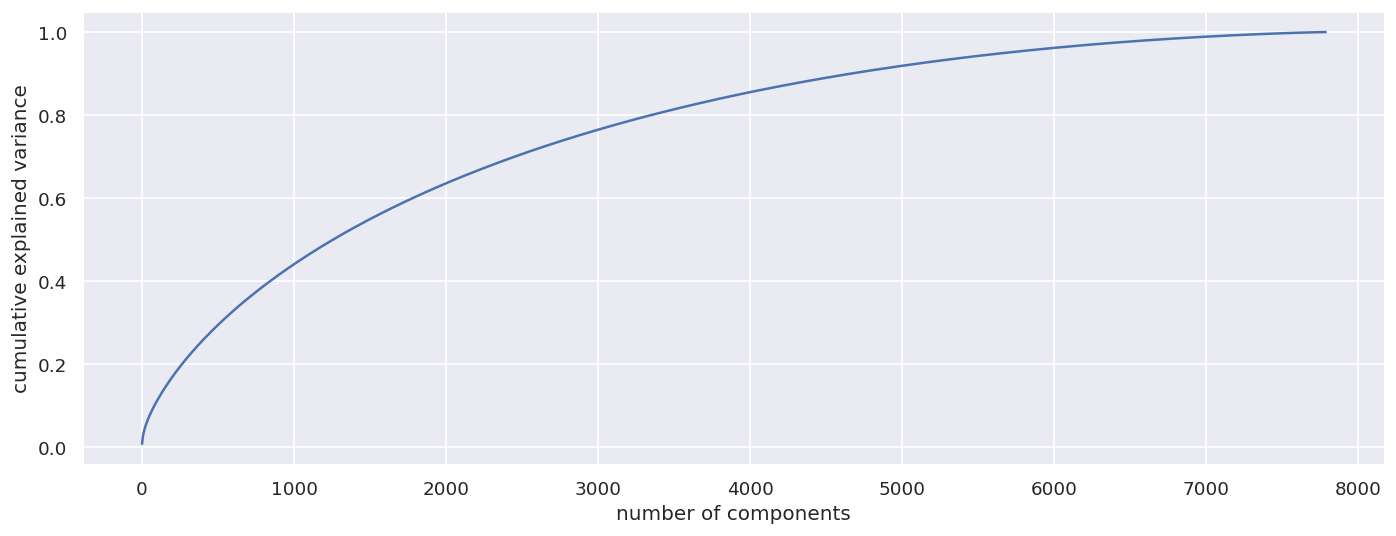

In [62]:
# Lets plot explained var v/s comp to check how many components to be considered.
plt.figure(figsize=(14,5), dpi=120)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

## 1. We can see from the above plot almost 95% of the variance can be explained by 5000 components.
## 2. Since choosing 5000 could be tricky we will set the value to be 95% in sklearn.

In [63]:
pca_tuned = PCA(n_components=0.95)
pca_tuned.fit(X.toarray())
X_transformed = pca_tuned.transform(X.toarray())
X_transformed.shape

(7787, 5678)

In [64]:
X_transformed

array([[ 1.24162162e-01,  1.56683176e-02, -1.81691272e-02, ...,
        -4.20140192e-03, -5.17923857e-03, -2.16223409e-04],
       [-3.60595052e-02,  3.41209227e-02,  1.02785568e-02, ...,
         6.43704289e-03,  8.66967590e-04, -4.48204544e-04],
       [-4.19034029e-02,  3.73896043e-02, -2.71782265e-02, ...,
        -2.67134911e-03, -2.47582844e-03,  4.07719607e-03],
       ...,
       [-6.52753507e-02, -3.20872830e-02,  2.16981517e-01, ...,
         9.60931615e-03, -2.44862613e-03,  7.02645221e-04],
       [ 9.83823267e-02, -4.32135394e-03,  2.14395475e-02, ...,
         4.08248328e-03,  2.11441845e-03,  1.02803501e-02],
       [-8.35391624e-02, -1.84643976e-01,  2.65370864e-01, ...,
         3.50149456e-03, -6.37840500e-03, -7.92039633e-03]])

## **Get optimum K value using Metric:Shilhouette.**

In [65]:
pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


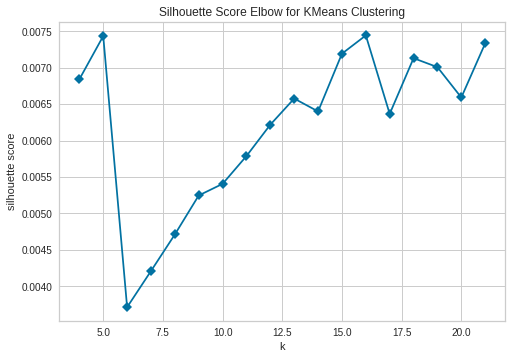

In [66]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=5)
visualizer = KElbowVisualizer(model, k=(4,22), metric='silhouette', timings=False, locate_elbow=False)

visualizer.fit(X_transformed)
visualizer.show()

In [67]:
from yellowbrick.cluster import SilhouetteVisualizer

In [68]:
from sklearn.metrics import silhouette_score, silhouette_samples

def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters, random_state=5)
      preds = km.fit_predict(X_transformed)
      centers = km.cluster_centers_

      score = silhouette_score(X_transformed, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(X_transformed) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data

For n_clusters = 2, silhouette score is 0.004824695848733806


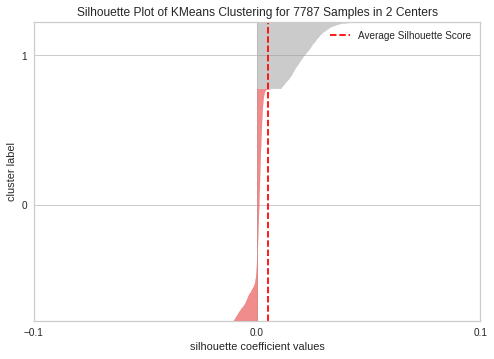

For n_clusters = 3, silhouette score is 0.005948178745368627


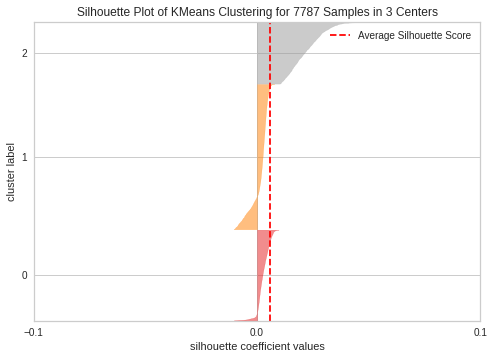

For n_clusters = 4, silhouette score is 0.006839723171359088


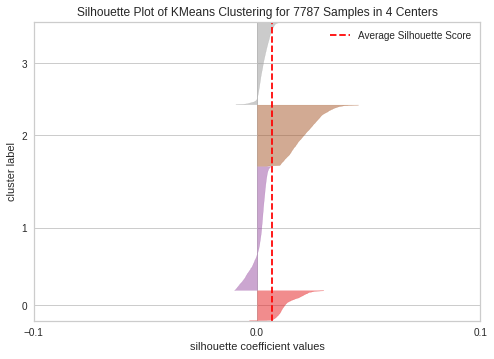

For n_clusters = 5, silhouette score is 0.007432633202024179


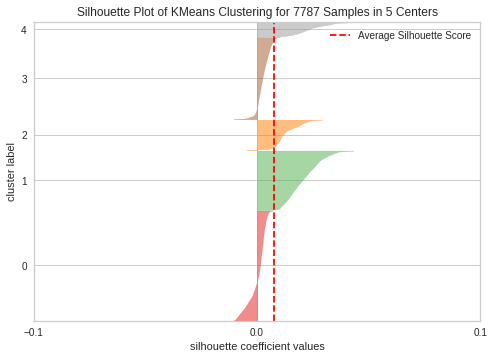

For n_clusters = 6, silhouette score is 0.0037148066743366713


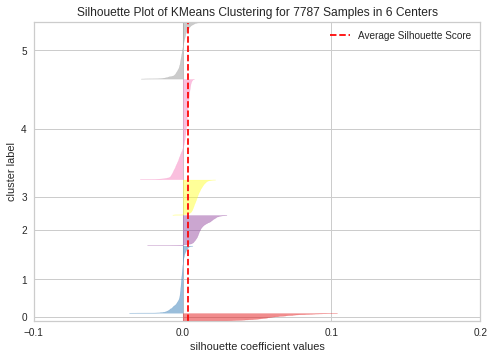

For n_clusters = 7, silhouette score is 0.00421100921118712


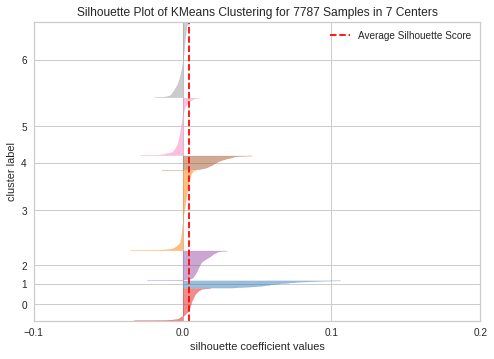

For n_clusters = 8, silhouette score is 0.004712260288805962


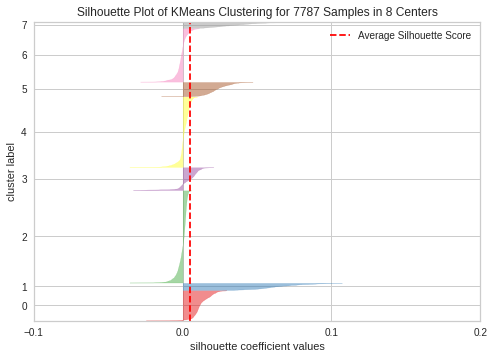

For n_clusters = 9, silhouette score is 0.0052465948398194495


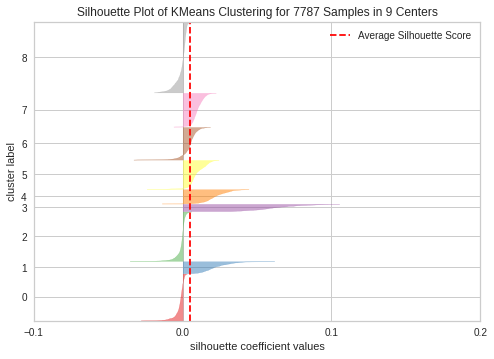

For n_clusters = 10, silhouette score is 0.005406148204499988


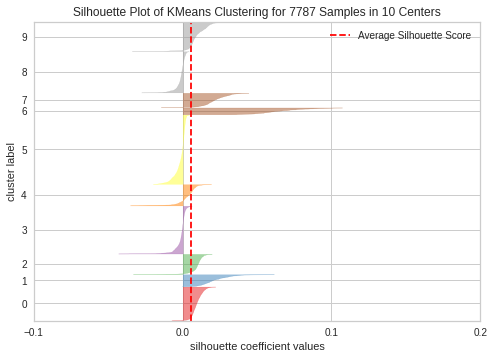

For n_clusters = 11, silhouette score is 0.005787394134122751


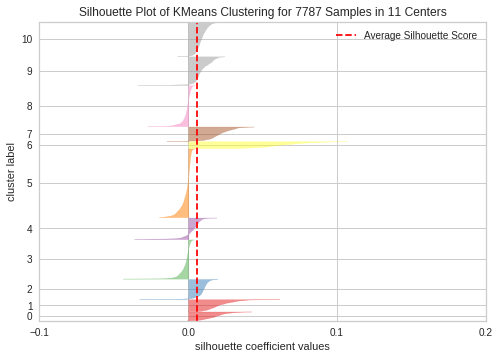

For n_clusters = 12, silhouette score is 0.006217807673322502


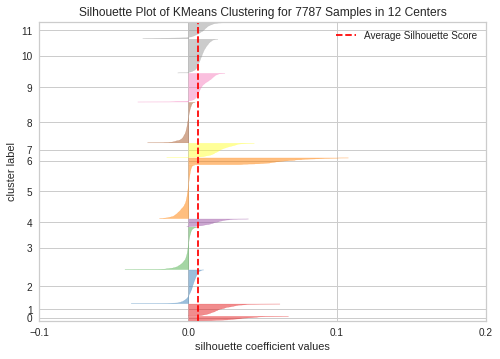

For n_clusters = 13, silhouette score is 0.006575507538460517


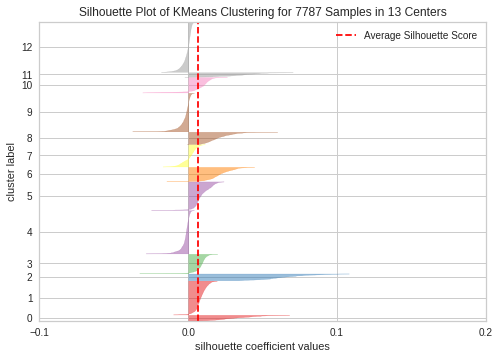

For n_clusters = 14, silhouette score is 0.0063989417352401


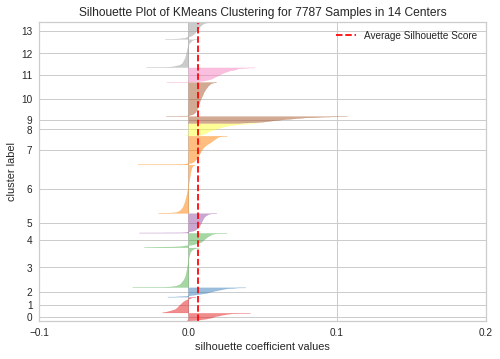

For n_clusters = 15, silhouette score is 0.00719091102719308


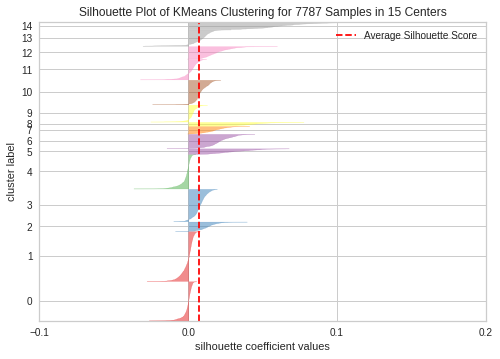

For n_clusters = 16, silhouette score is 0.007441201552835128


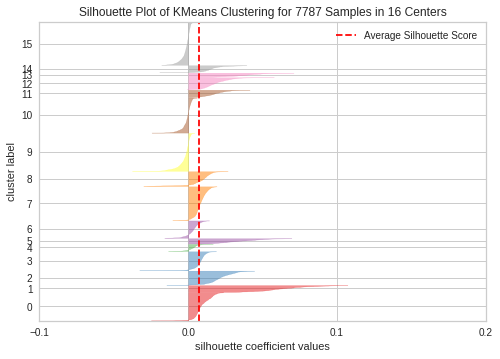

For n_clusters = 17, silhouette score is 0.006365363004371545


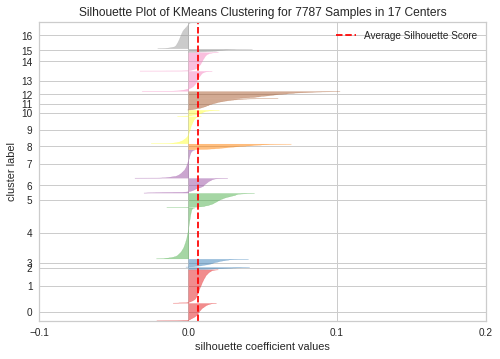

For n_clusters = 18, silhouette score is 0.007128923877802593


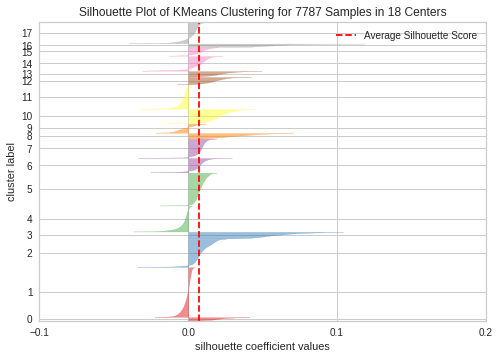

For n_clusters = 19, silhouette score is 0.00700624104360077


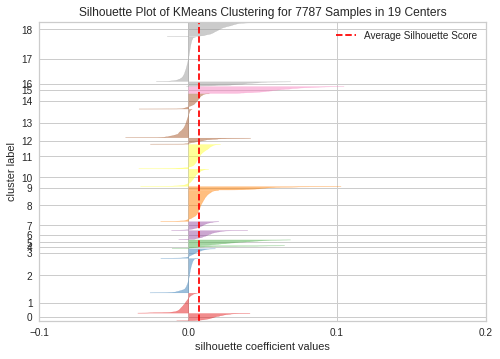

For n_clusters = 20, silhouette score is 0.006590135895856079


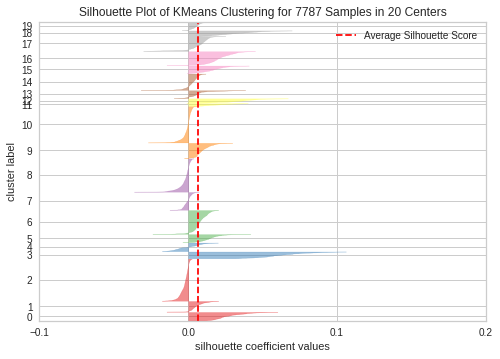

For n_clusters = 21, silhouette score is 0.007331660311409323


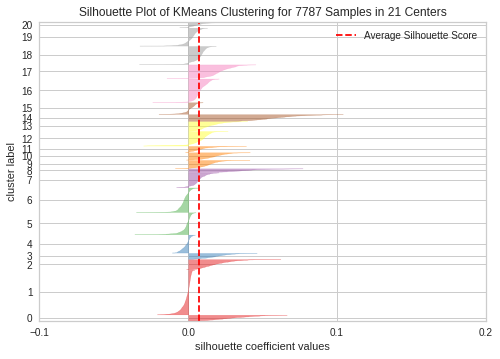

In [69]:
silhouette_score_analysis(22)

# **Elbow method to find optimum k value:**

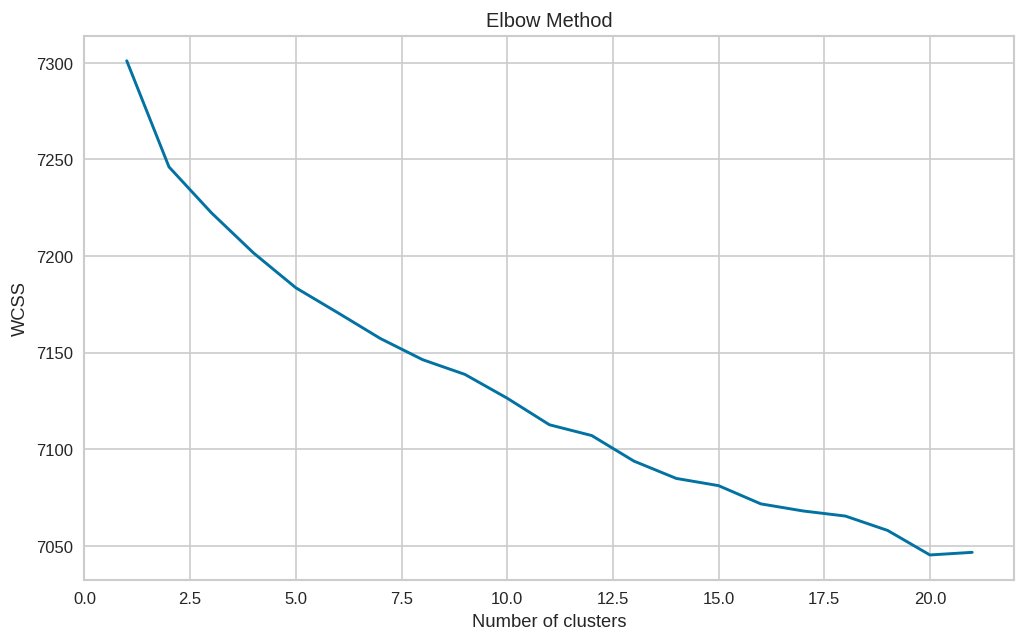

In [70]:
plt.figure(figsize=(10,6), dpi=120)
wcss = []
for i in range(1, 22):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_transformed)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 22), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# **Perform Clustering considering k=10.**

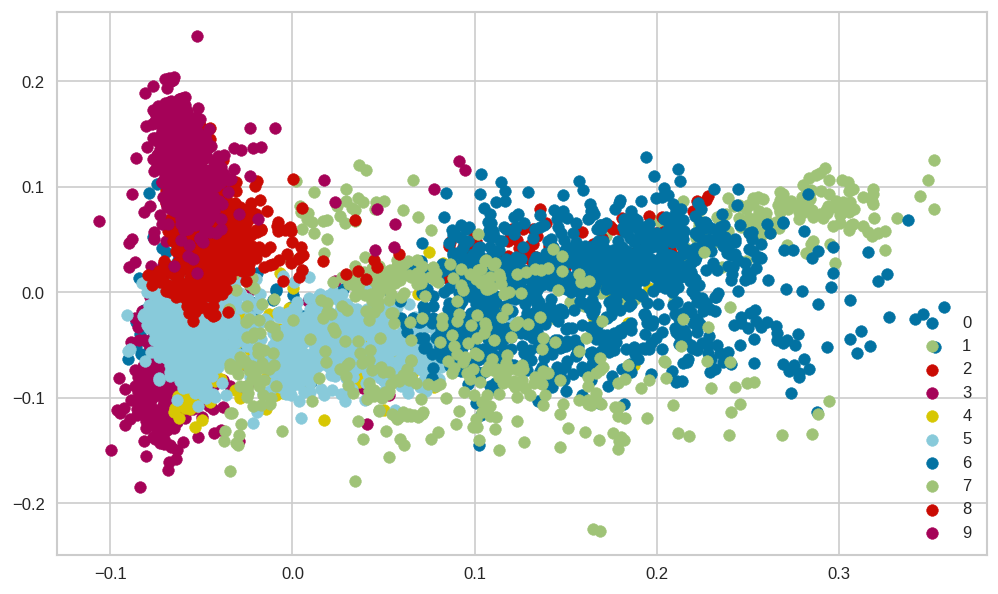

In [71]:
plt.figure(figsize=(10,6), dpi=120)

kmeans= KMeans(n_clusters=10, init= 'k-means++', random_state=9)
kmeans.fit(X_transformed)

#predict the labels of clusters.
label = kmeans.fit_predict(X_transformed)
#Getting unique labels
unique_labels = np.unique(label)
 
#plotting the results:
for i in unique_labels:
    plt.scatter(X_transformed[label == i , 0] , X_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

In [72]:
# Add cluster values to the dateframe.
netflix['cluster_number'] = kmeans.labels_

In [73]:
#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [74]:
#word cloud for user rating review
def func_select_Category(category_name,column_of_choice):
  df_word_cloud = netflix[['cluster_number',column_of_choice]].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud['cluster_number']==category_name]
  text = " ".join(word for word in df_word_cloud[column_of_choice])
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Plot the wordclouds
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f'Cluster: {i}')
  plt.axis("off")
  plt.show()

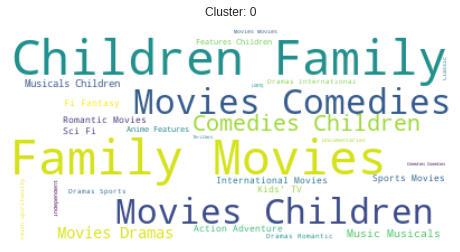

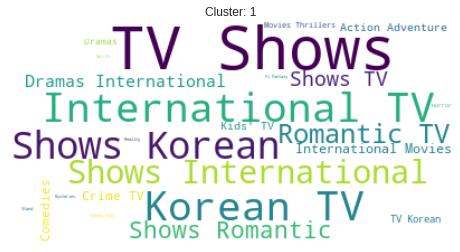

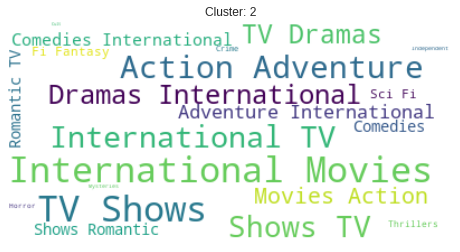

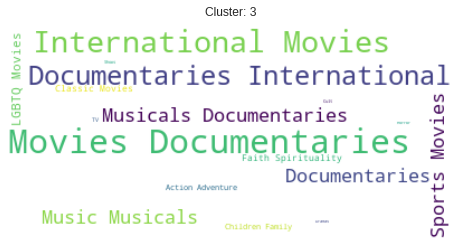

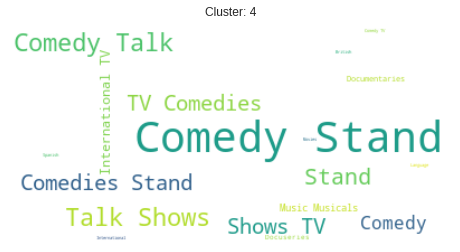

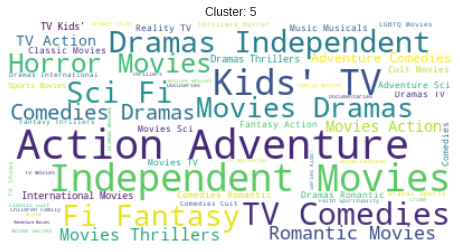

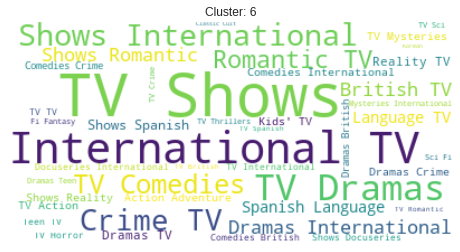

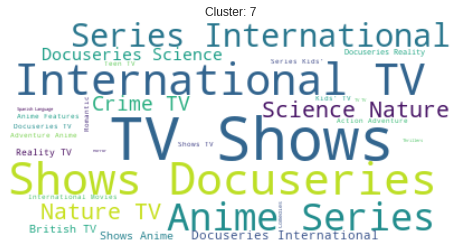

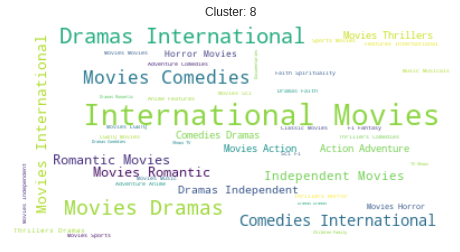

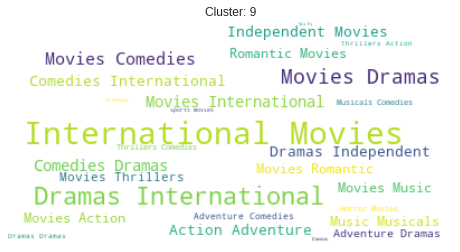

In [75]:
for i in range(10):
  func_select_Category(i,'listed_in')

In [76]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [77]:
t_vectorizer = TfidfVectorizer()
count_matrix= t_vectorizer.fit_transform(bag_of_words)

In [78]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.05415207, 0.0187834 , ..., 0.00518427, 0.02137484,
        0.00306128],
       [0.05415207, 1.        , 0.00512171, ..., 0.05087788, 0.00198072,
        0.003502  ],
       [0.0187834 , 0.00512171, 1.        , ..., 0.0073006 , 0.00198251,
        0.        ],
       ...,
       [0.00518427, 0.05087788, 0.0073006 , ..., 1.        , 0.00282336,
        0.15848331],
       [0.02137484, 0.00198072, 0.00198251, ..., 0.00282336, 1.        ,
        0.02657353],
       [0.00306128, 0.003502  , 0.        , ..., 0.15848331, 0.02657353,
        1.        ]])

In [79]:
indices = pd.Series(cluster_df.index)
indices[:5]

0       3%
1     7:19
2    23:59
3        9
4       21
Name: title, dtype: object

In [80]:
# function that takes in movie title as input and returns the top 10 recommended movies
def recommendations(Title, cosine_sim = cosine_sim):
    
    recommended_movies = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == Title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(cluster_df.index)[i])
        
    return recommended_movies

In [81]:
# Lets try getting recommendations for Movies.
movie_recommendations = pd.DataFrame(recommendations('Bad Boys'), columns=['Recommendations'])
movie_recommendations.head(11)

,Recommendations
0,Bad Boys II
1,GoldenEye
2,Tortilla Soup
3,Martin Lawrence Live: Runteldat
4,War on Everyone
5,Madam Secretary
6,Slow West
7,Tremors 5: Bloodline
8,Dollar
9,Operation Odessa


In [82]:
# Lets try getting recommendations for Tv-Shows.
tvshows_recommendations = pd.DataFrame(recommendations('13 Reasons Why'), columns=['Recommendations'])
tvshows_recommendations.head(11)

,Recommendations
0,13 Reasons Why: Beyond the Reasons
1,Mind Game
2,The Sinner
3,Disappearance
4,Unsolved Mysteries
5,Anjaan: Special Crimes Unit
6,Frequency
7,Re:Mind
8,Gigantosaurus
9,The Staircase


# **Conclusions:**

### 1. It was interesting to find that majority of the content available on Netflix is Movies.
### 2. But in the recent years it has been focusing more on Tv-Shows.
### 3. Most of these contents are released either in the year ending or the beginning.
### 4. United States and India are among the top 5 countries that produce all of the available content on the platform.
### 5. Also 6 of the actors among the top ten actors with maximum content are from India.
### 6. TV-MA tops the charts, indicating that mature content is more popular on Netflix.
### 7. k=10 was found to be an optimal value for clusters using which we grouped our data into 10 distinct clusters.
### 8. Using the given data a simple recommender system was created using cosine_similarity and recommendations for Movies and Tv Shows were obtained.

# **Future Scope:**

### 1. Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.
### 2. More time could be given into building a better recommender system, which later can be deployed on web for usage.